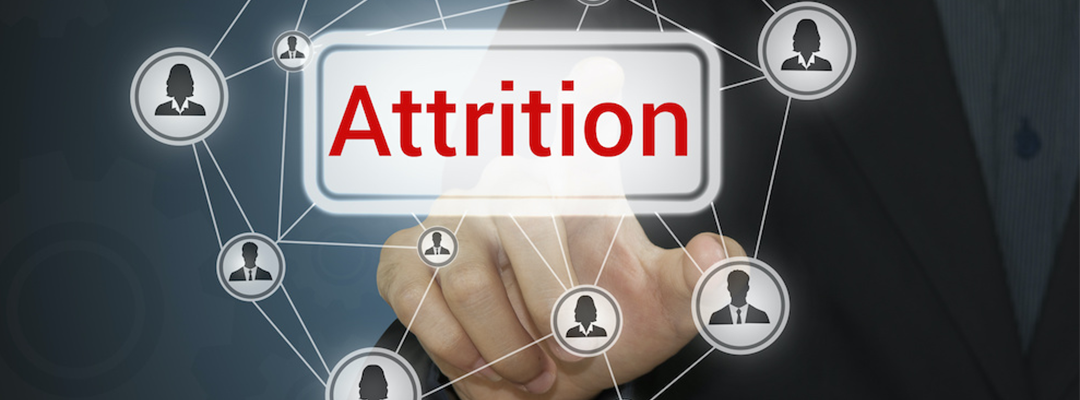

### HR Analytics Project- Understanding the Attrition in HR
#### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers. 

### Importing libraries and Data

In [1]:
# importing numpy and panda
import numpy as np
import pandas as pd


#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# EDA
from scipy.stats import zscore #outliers
from sklearn.preprocessing import power_transform  #skewness 
from statsmodels.stats.outliers_influence import variance_inflation_factor #multi-collinearity

# splitting of data
from sklearn.model_selection import train_test_split

# for model building
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# for checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve


# Library for saving data
import joblib

# library for GridSearchCV 
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/Users/prita/Downloads/DATASETS/Capstone Project/HR Analytics Project- Understanding the Attrition in HR/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Basic details of data

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# there are repeated value in the dataframe so checking unique values for all columns
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
# dropping columns which have same value for all rows 
df=df.drop(columns=["StandardHours","EmployeeCount","Over18"])

In [10]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,10,3,...,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,11,4,...,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,12,4,...,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,13,3,...,3,2,2,17,3,2,7,7,7,7


In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### EDA

**Exploring Categorical Data**

['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

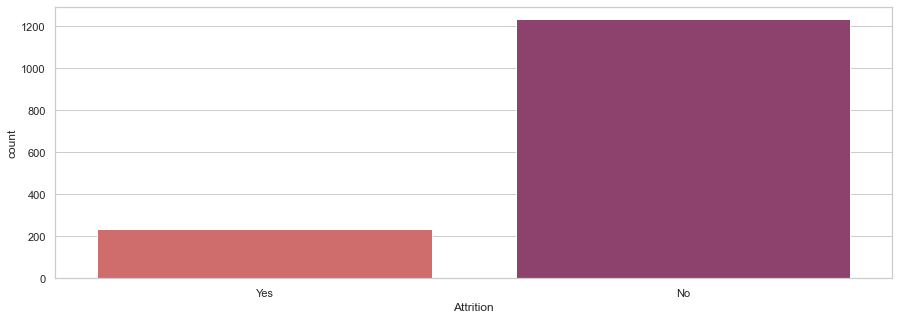

In [12]:
# Attrition
sns.set(style="whitegrid")

plt.figure(figsize=(15,5))

print(df['Attrition'].unique()) 
print(df['Attrition'].value_counts())
sns.countplot(df['Attrition'], palette="flare")

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

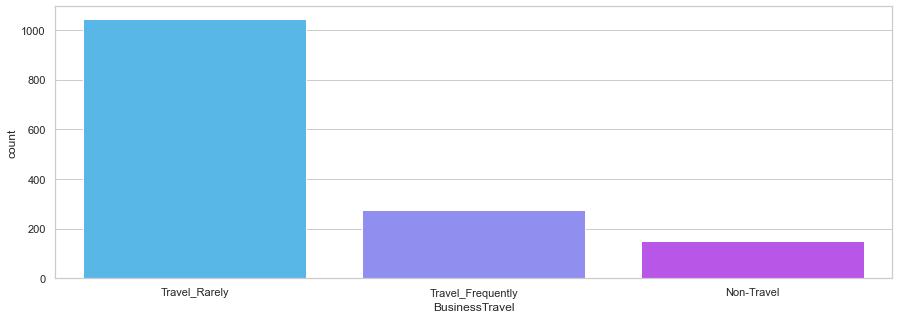

In [13]:
# BusinessTravel
plt.figure(figsize=(15,5))

print(df['BusinessTravel'].unique()) 
print(df['BusinessTravel'].value_counts())
sns.countplot(df['BusinessTravel'], palette="cool")

['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<AxesSubplot:xlabel='Department', ylabel='count'>

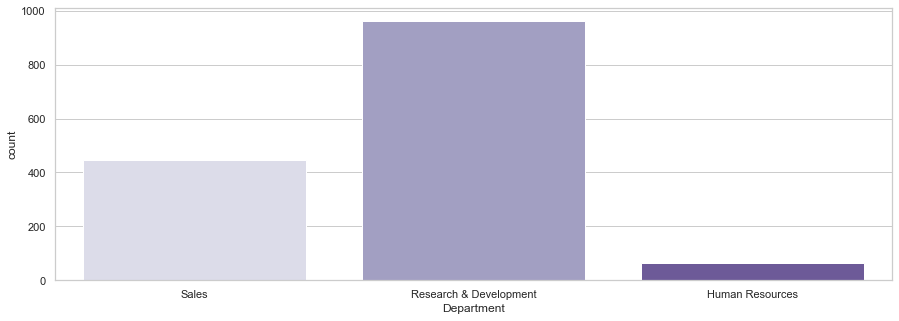

In [14]:
#Department
plt.figure(figsize=(15,5))

print(df['Department'].unique()) 
print(df['Department'].value_counts())
sns.countplot(df['Department'], palette="Purples")

['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


<AxesSubplot:xlabel='EducationField', ylabel='count'>

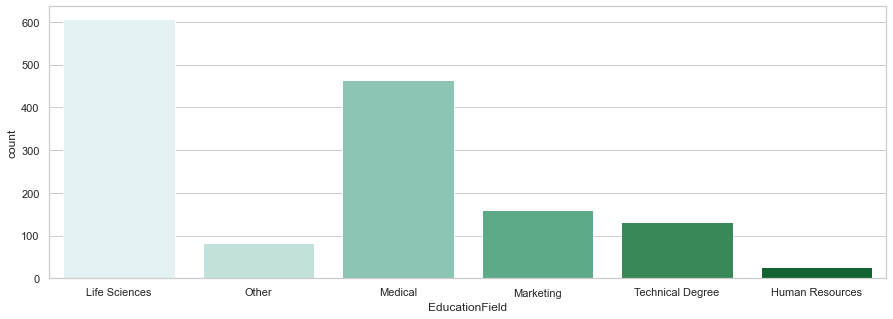

In [15]:
#EducationField
plt.figure(figsize=(15,5))

print(df['EducationField'].unique()) 
print(df['EducationField'].value_counts())
sns.countplot(df['EducationField'], palette="BuGn")

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


<AxesSubplot:xlabel='JobRole', ylabel='count'>

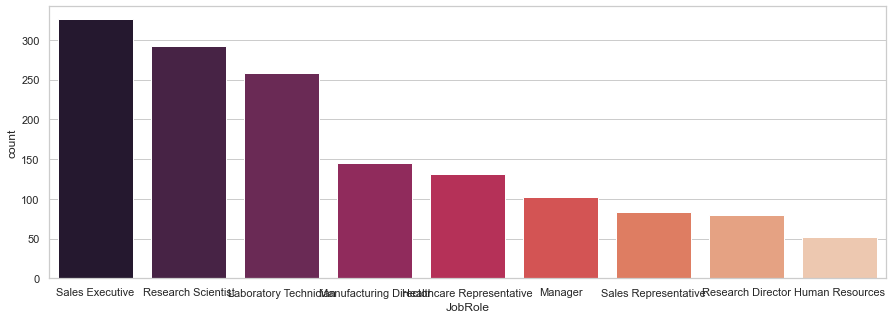

In [16]:
# Job Role
plt.figure(figsize=(15,5))

print(df['JobRole'].unique()) 
print(df['JobRole'].value_counts())
sns.countplot(df['JobRole'], palette="rocket")

['Single' 'Married' 'Divorced']
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

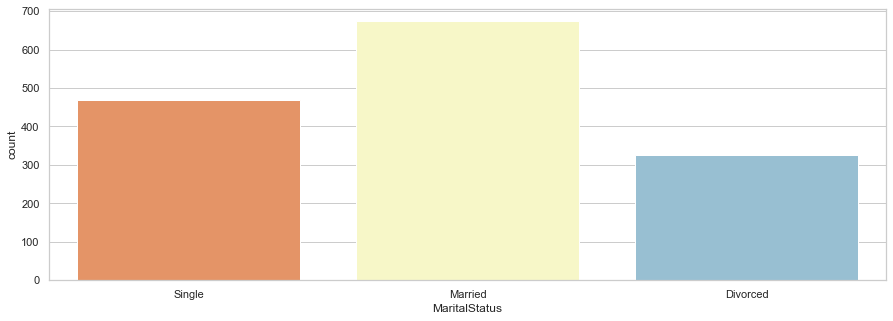

In [17]:
#MaritalStatus
plt.figure(figsize=(15,5))

print(df['MaritalStatus'].unique()) 
print(df['MaritalStatus'].value_counts())
sns.countplot(df['MaritalStatus'], palette="RdYlBu")

['Yes' 'No']
No     1054
Yes     416
Name: OverTime, dtype: int64


<AxesSubplot:xlabel='OverTime', ylabel='count'>

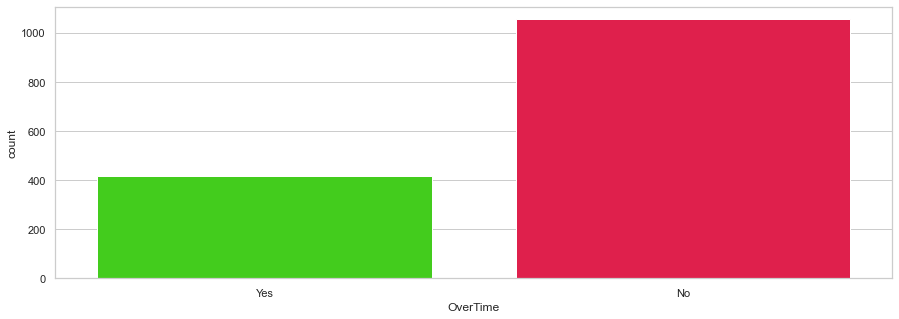

In [18]:
# OverTime
plt.figure(figsize=(15,5))

print(df['OverTime'].unique()) 
print(df['OverTime'].value_counts())
sns.countplot(df['OverTime'], palette="prism")

['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

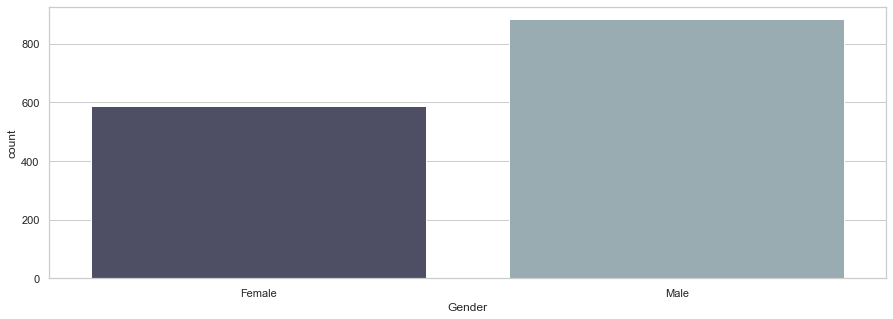

In [19]:
# Gender
plt.figure(figsize=(15,5))

print(df['Gender'].unique()) 
print(df['Gender'].value_counts())
sns.countplot(df['Gender'], palette="bone")

**OBSERVATION**

1. Attrition has two classes, yes and no. Total count for no is 1233 and for yes is 237.(Imabalanced)
2. There are more people who travel rarely than who travel frequently than who do not travel.
3. Majority of people are in R&D feild. Second highest is sales and least are in human resources
4. Education-wise majority of the people are in Life sciences.
5. Most of the people do not work overtime
6. There are more males than females


**Exploring relation between dependent and independent variables**

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

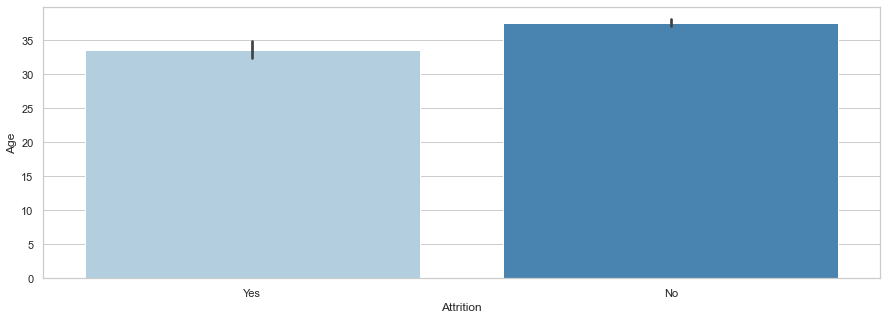

In [20]:
plt.figure(figsize=(15,5))

x = df['Attrition']
y = df['Age']
sns.barplot(x,y, palette="Blues")

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

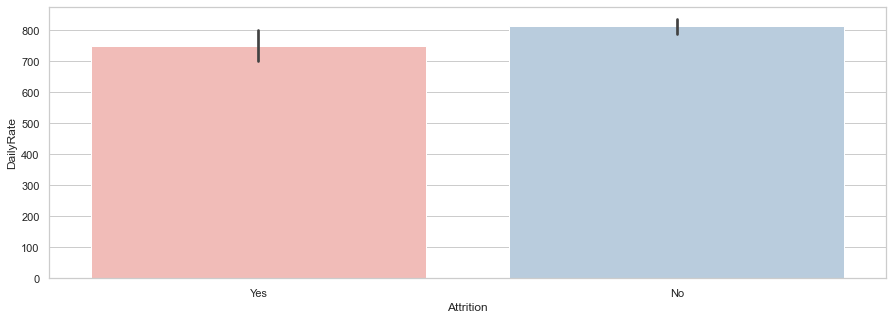

In [21]:
plt.figure(figsize=(15,5))

x = df['Attrition']
y = df['DailyRate']
sns.barplot(x,y,palette="Pastel1")

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

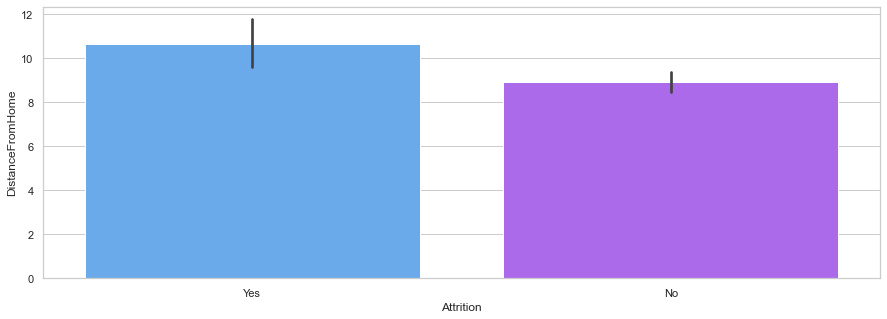

In [22]:
plt.figure(figsize=(15,5))

x = df['Attrition']
y = df['DistanceFromHome']
sns.barplot(x,y,palette="cool")

<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

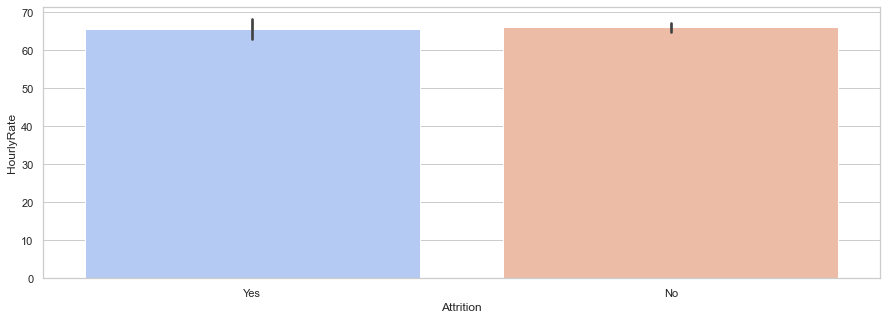

In [23]:
plt.figure(figsize=(15,5))

x = df['Attrition']
y = df['HourlyRate']
sns.barplot(x,y,palette="coolwarm")

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

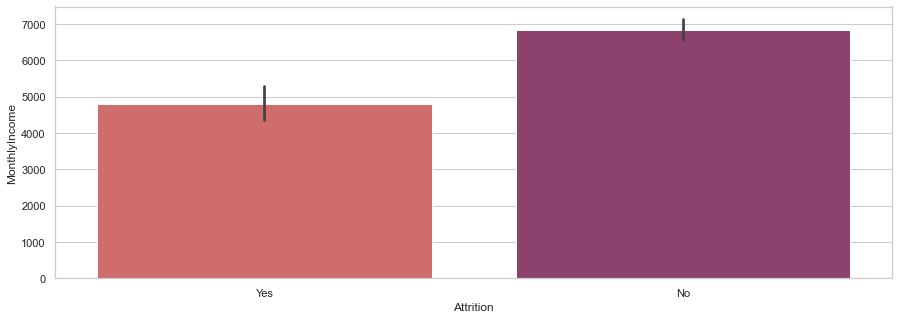

In [24]:
plt.figure(figsize=(15,5))

x = df['Attrition']
y = df['MonthlyIncome']
sns.barplot(x,y,palette="flare")

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyRate'>

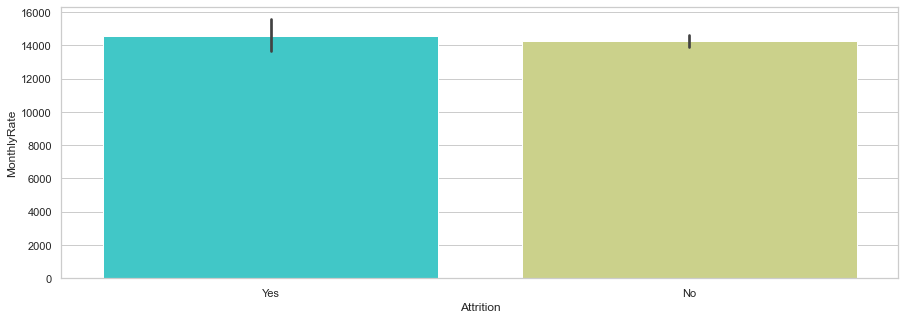

In [25]:
plt.figure(figsize=(15,5))

x = df['Attrition']
y = df['MonthlyRate']
sns.barplot(x,y,palette="rainbow")

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

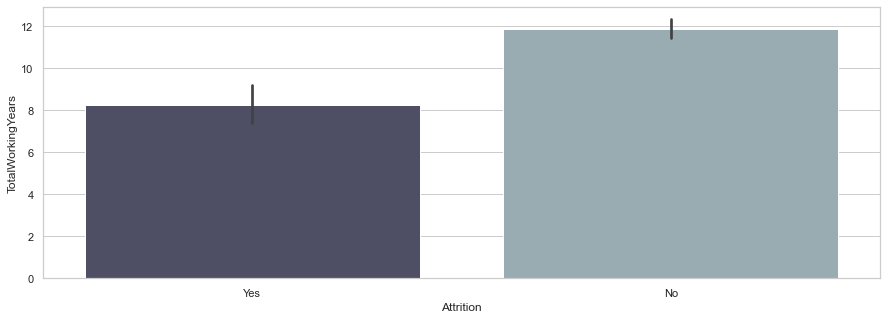

In [26]:
plt.figure(figsize=(15,5))

x = df['Attrition']
y = df['TotalWorkingYears']
sns.barplot(x,y,palette="bone")

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

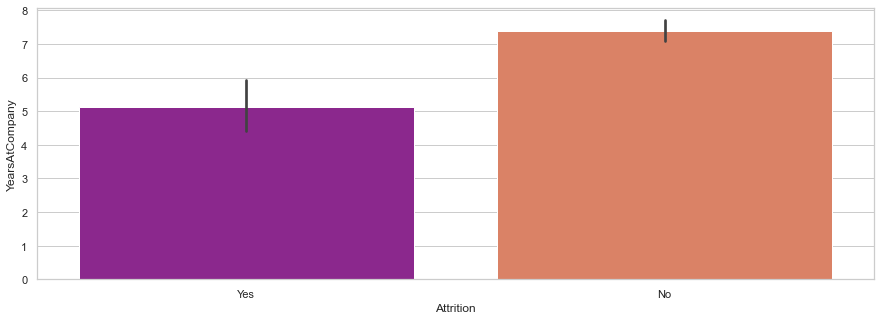

In [27]:
plt.figure(figsize=(15,5))

x = df['Attrition']
y = df['YearsAtCompany']
sns.barplot(x,y,palette="plasma")

<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

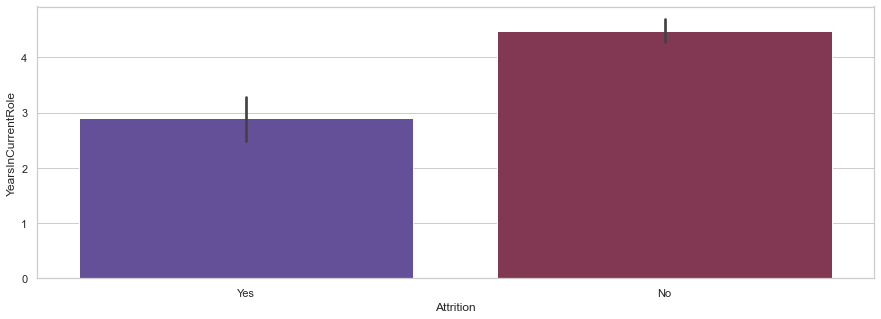

In [28]:
plt.figure(figsize=(15,5))

x = df['Attrition']
y = df['YearsInCurrentRole']
sns.barplot(x,y,palette="twilight")

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

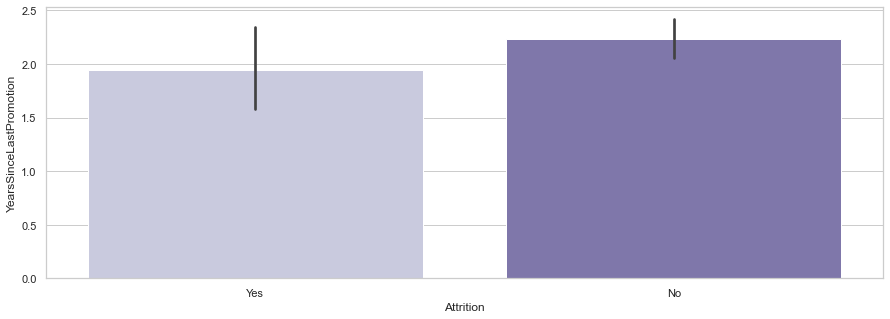

In [29]:
plt.figure(figsize=(15,5))

x = df['Attrition']
y = df['YearsSinceLastPromotion']
sns.barplot(x,y,palette="Purples")

<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

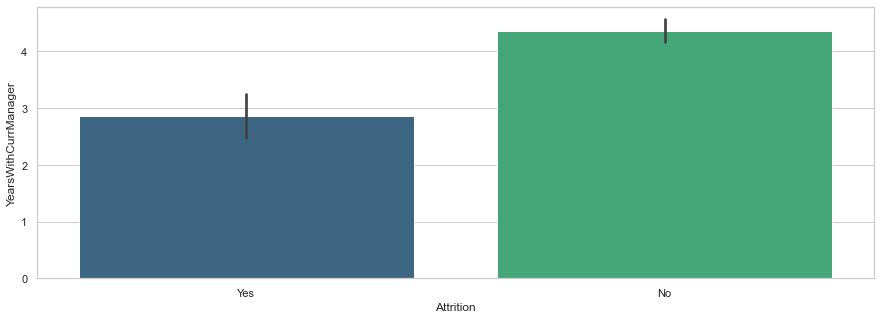

In [31]:
plt.figure(figsize=(15,5))

x = df['Attrition']
y = df['YearsWithCurrManager']
sns.barplot(x,y,palette="viridis")

**OBSERVATION**

Following are contributing/major factors for Attrition
1. People below age 35
2. Lower Daily rate
3. distance from home > 10units
4. Income below 5000
5. People working for under 9 years
6. Employees having gone upto 2 years since last promotion
7. working with current manager for less than 4 years

Following have no effect on Attrition
1. Monthly Rate
2. Hourly Rate




**Outliers**

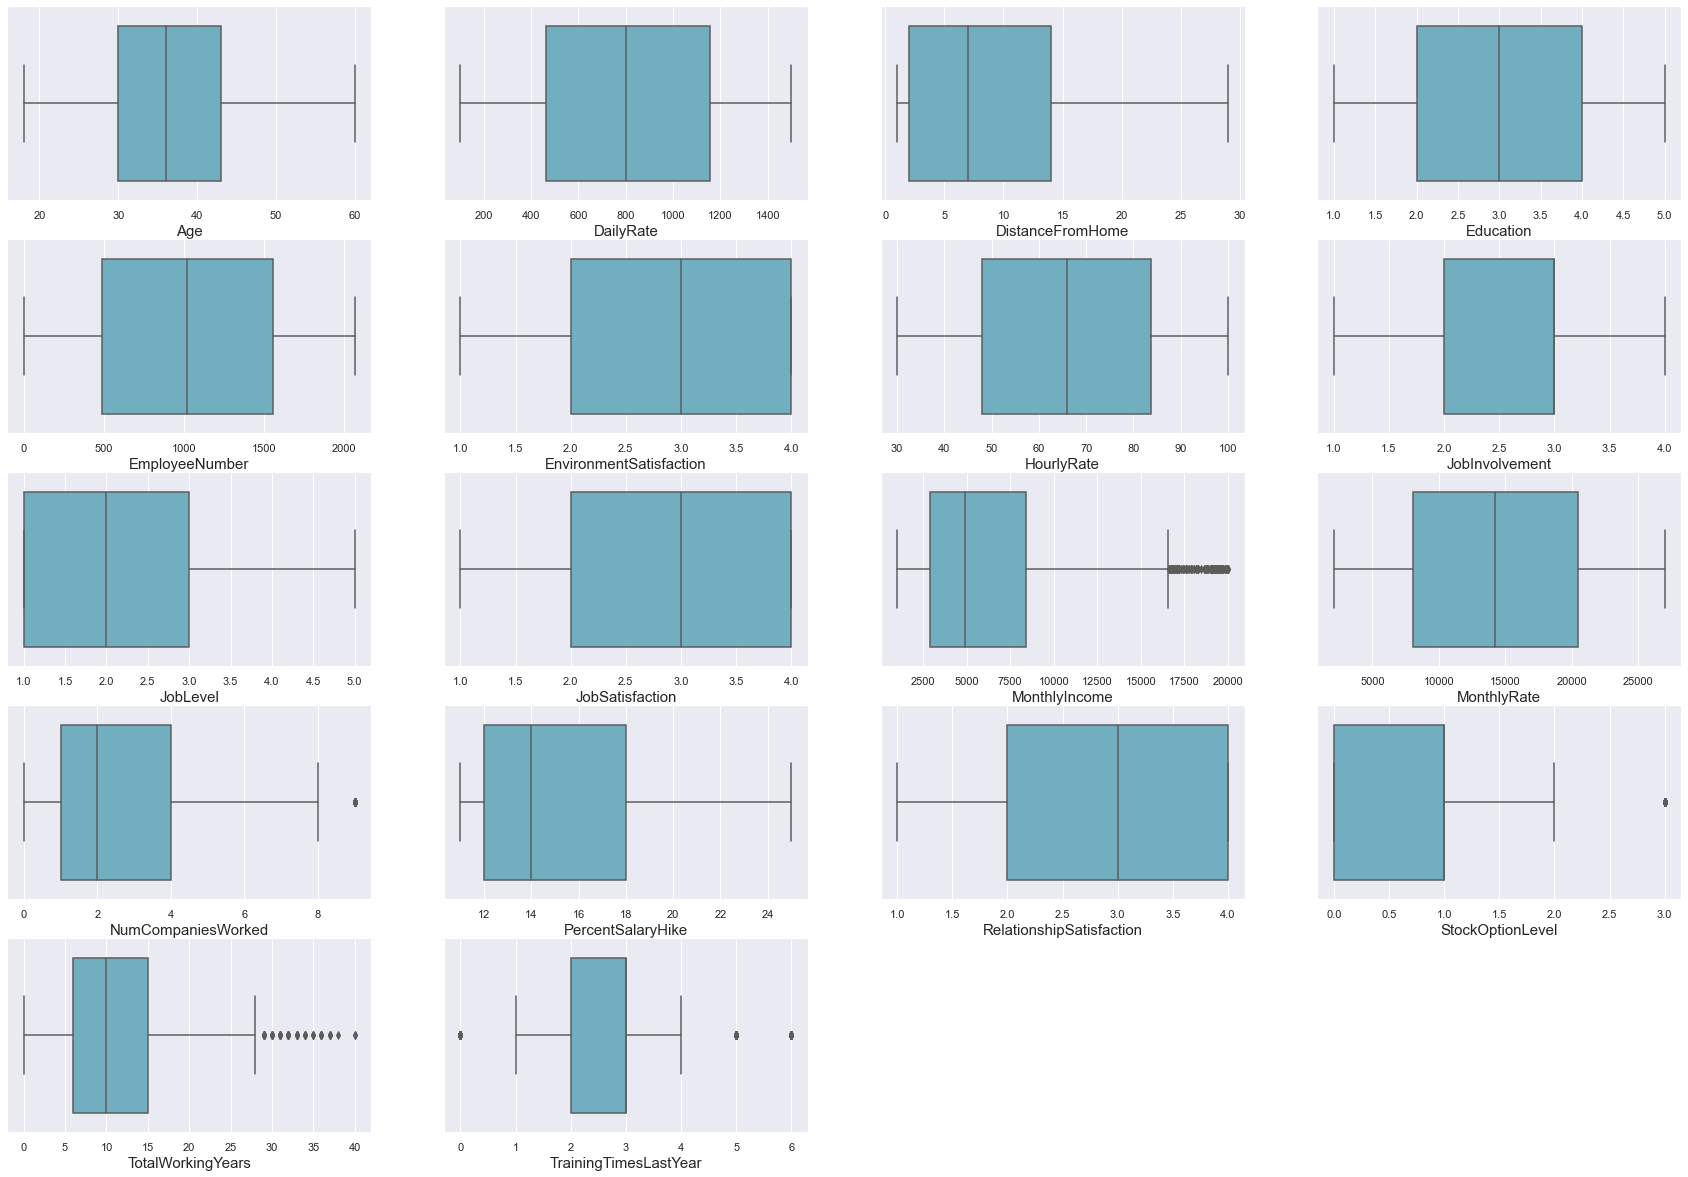

In [32]:
sns.set(style="darkgrid")

plt.figure(figsize=(30,25), facecolor='white')
plotno = 1
df_out = df[['Age', 'DailyRate',
       'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
for column in df_out:
    if plotno<=18:
        b = plt.subplot(6,4,plotno)
        sns.boxplot(df[column],color="c")
        plt.xlabel(column,fontsize=15)
    plotno+=1
plt.show()

**OBSERVATIONS**  
Outliers are present in 
1. Total Working years
2. Monthly Income

In [33]:
# removing outliers
# creating a dataframe without categorical values 
df1 = df.drop(columns = ['BusinessTravel','Department','PerformanceRating',
                        'EducationField','Gender','JobRole','MaritalStatus','OverTime','Attrition'].copy())

In [34]:
df1.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,11,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,...,23,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,...,15,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,...,11,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,...,12,4,1,6,3,3,2,2,2,2


In [35]:
#using z score method to remove outliers
zs = zscore(df1)
z_score_abs = np.abs(zs)

df2 = df1[(z_score_abs < 3).all(axis=1)] # taking 3 as threshold value

In [36]:
dropindx = df.index.difference(df2.index)

In [37]:
dropindx

Int64Index([  28,   45,   62,   63,   64,   85,   98,  110,  123,  126,  153,
             178,  187,  190,  218,  231,  237,  270,  281,  326,  386,  401,
             411,  425,  427,  445,  466,  473,  477,  535,  561,  584,  592,
             595,  616,  624,  635,  653,  677,  686,  701,  716,  746,  749,
             752,  799,  838,  861,  875,  894,  914,  918,  922,  926,  937,
             956,  962,  976, 1008, 1024, 1043, 1078, 1086, 1093, 1111, 1116,
            1135, 1138, 1156, 1184, 1221, 1223, 1242, 1295, 1301, 1303, 1327,
            1331, 1348, 1351, 1401, 1414, 1430],
           dtype='int64')

In [38]:
df.drop(dropindx,inplace = True) 

In [39]:
df.reset_index(drop=True,inplace = True)

In [40]:
df.shape

(1387, 32)

**Checking Skewness**

In [41]:
# splitting data into x and y
X = df.drop(columns = ['Attrition'])
Y = df['Attrition']

In [42]:
X.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

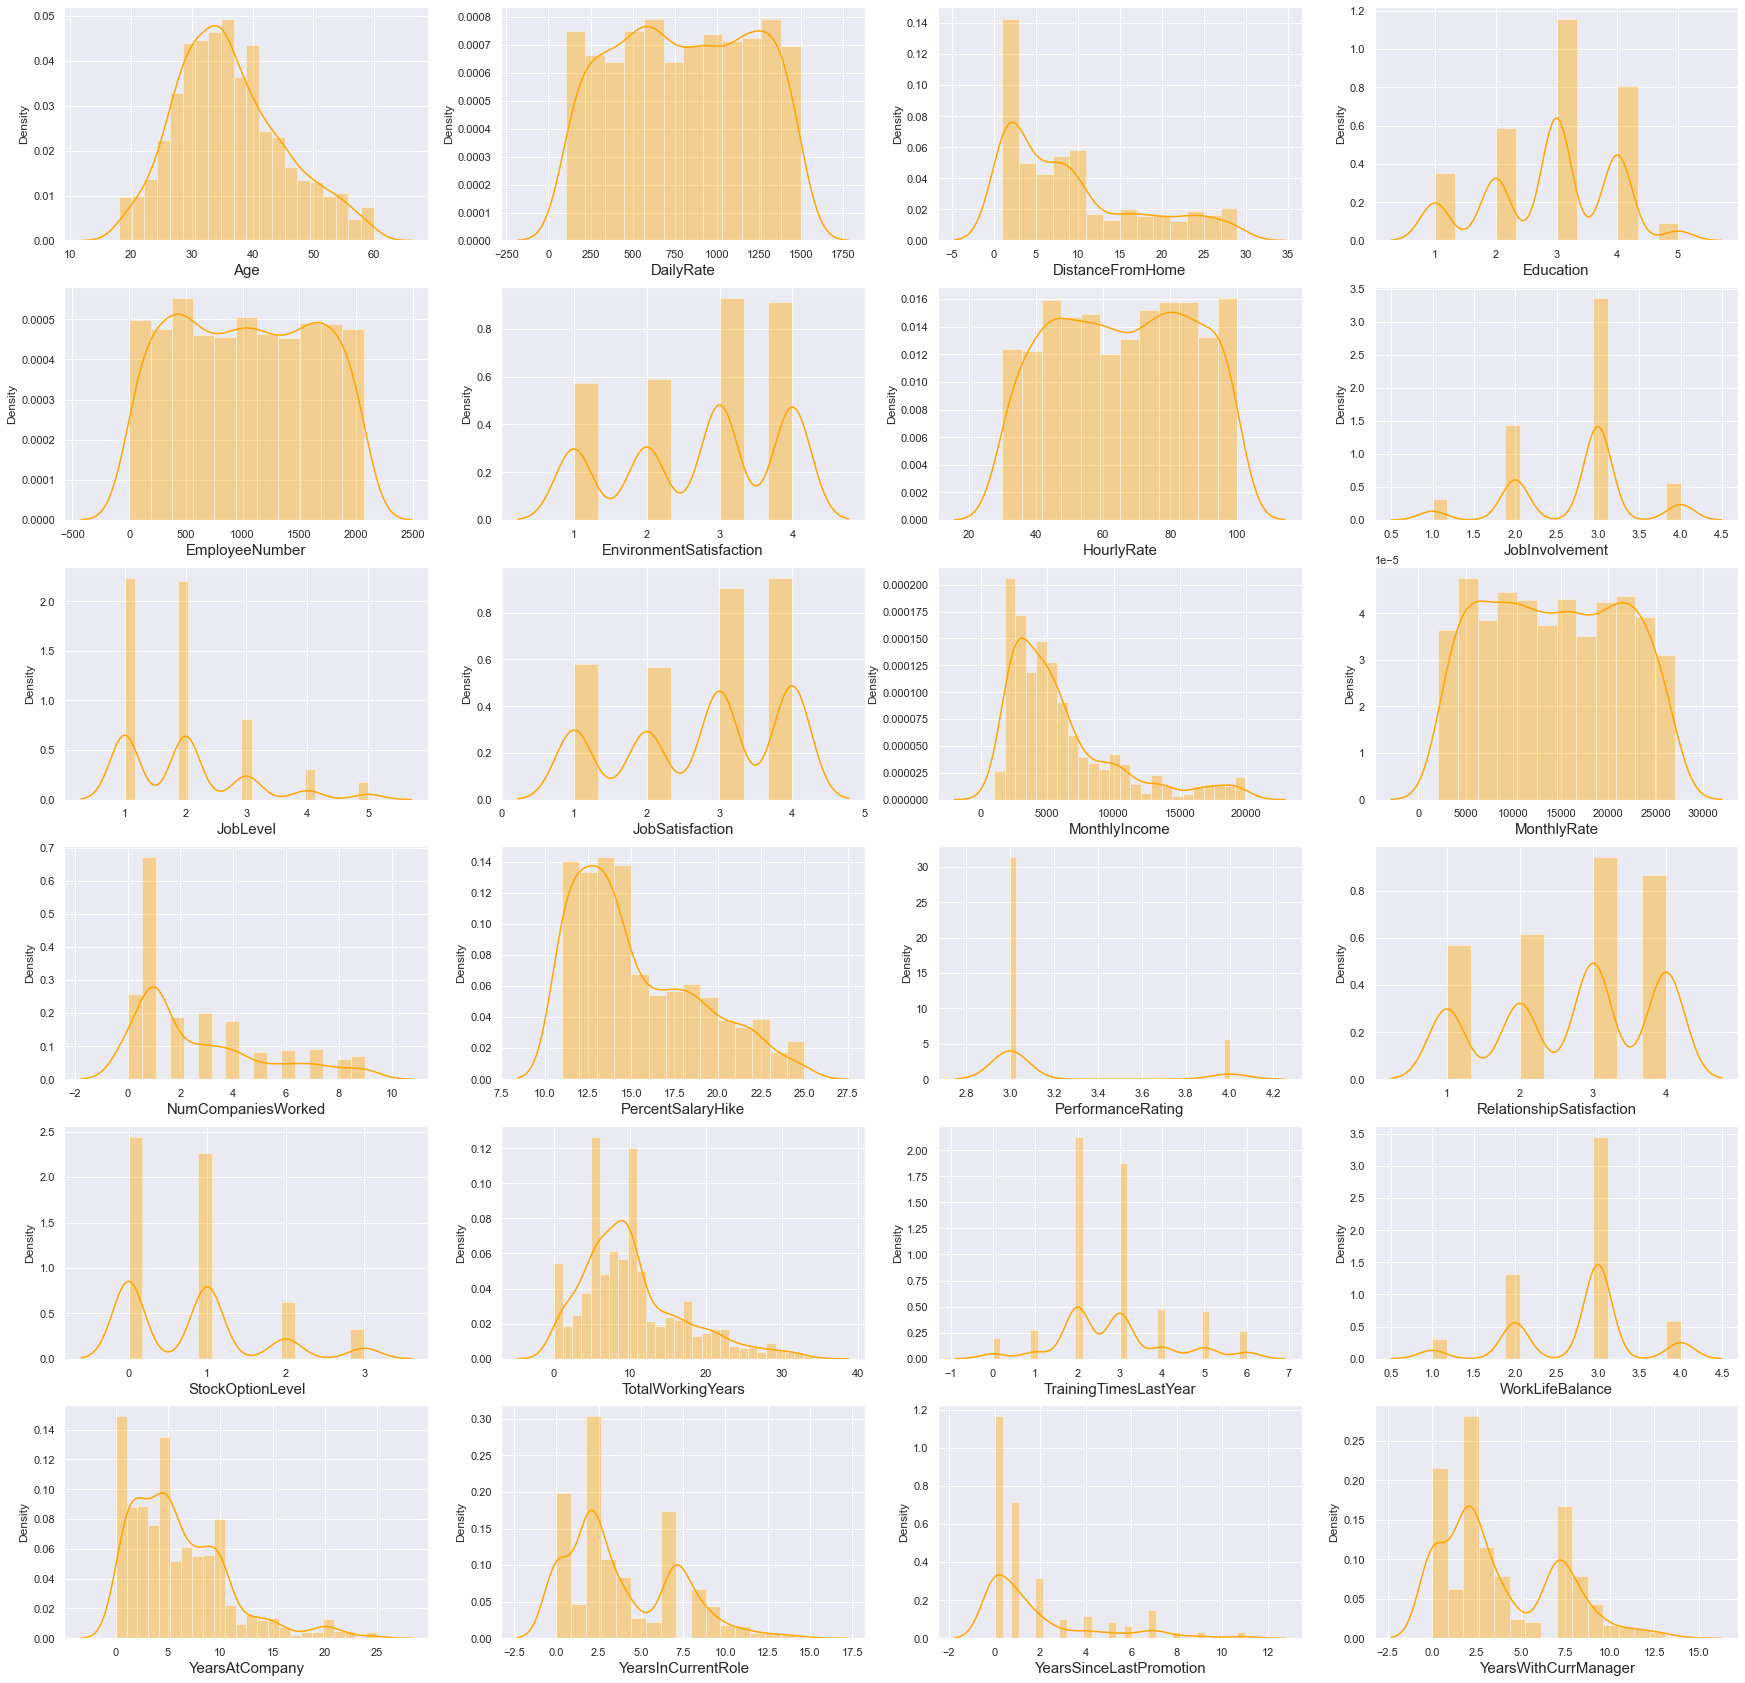

In [43]:
# checking distribution of features
# Checking how the data has been distriubted in each column
plt.figure(figsize=(30,30), facecolor='white')
plotno = 1

for i in X.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']):
    if plotno <= 35:
        a = plt.subplot(6,4,plotno)
        sns.distplot(X[i],color='orange')
        plt.xlabel(i,fontsize=15)
    plotno+=1
plt.show()

In [44]:
X.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

**OBSERVATIONS**  

Following columns are skewed

1. DistanceFromHome 
2. MonthlyIncome
3. TotalWorkingYears
4. YearsatCompany
5. PercentSalaryHike
6. YearsWithCurrManager
7. YearsInCurrentRole

In [45]:
# removing skewness
# power transform
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X.drop(columns = ['BusinessTravel','Department',
                                                'EducationField','Gender','JobRole','MaritalStatus','OverTime']))

In [46]:
df_new=power_transform(X.drop(columns = ['BusinessTravel','Department',
                                                'EducationField','Gender','JobRole','MaritalStatus','OverTime']))

X_new=pd.DataFrame(df_new,columns=X.drop(columns = ['BusinessTravel','Department',
                                                'EducationField','Gender','JobRole','MaritalStatus','OverTime']).columns)

X_new.skew()

Age                        -0.004079
DailyRate                  -0.199742
DistanceFromHome           -0.008149
Education                  -0.103747
EmployeeNumber             -0.287518
EnvironmentSatisfaction    -0.205472
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobSatisfaction            -0.217730
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
dtype: float64

**OBSERVATIONS** 

Skewness handled

**Balancing imbalanced class**

In [47]:
# label encoding on Attrition(label)
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

In [48]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,605,2,0,1,1,0,1,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,108,1,7,0,1,1,2,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,783,1,1,1,4,2,3,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,798,1,2,3,1,3,3,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,298,1,1,0,3,4,0,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,18,0,1,476,1,22,1,3,1382,2,...,0,2,1,17,3,2,5,2,0,3
1383,21,0,2,312,1,5,0,3,1383,3,...,0,0,1,9,5,2,7,7,1,7
1384,9,0,2,39,1,3,2,1,1384,1,...,1,1,1,6,0,2,6,2,0,3
1385,31,0,1,561,2,1,2,3,1385,3,...,0,3,0,17,3,1,9,6,0,8


In [49]:
count_0,count_1 = df['Attrition'].value_counts()

In [50]:
count_0

1158

In [51]:
count_1

229

In [52]:
# separating
class_0 = df[df['Attrition'] == 0]
class_1 = df[df['Attrition'] == 1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1158, 32)
class 1: (229, 32)


total =  0    229
1    229
Name: Attrition, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

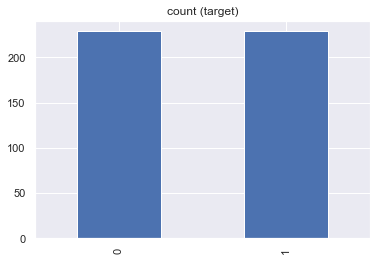

In [53]:
class0_un = class_0.sample(count_1)

test_un = pd.concat([class0_un, class_1], axis=0)

print("total = ",test_un['Attrition'].value_counts())
test_un['Attrition'].value_counts().plot(kind='bar', title='count (target)')

In [54]:
df=test_un

**Multicollinearity**

In [55]:
# vif
x = df.drop(columns=["Attrition"])
y = df['Attrition']



scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

vif = pd.DataFrame()
vif["quality"] = [variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"] = x.columns
vif

,quality,feature
0,1.852164,Age
1,1.037969,BusinessTravel
2,1.091184,DailyRate
3,2.579895,Department
4,1.067033,DistanceFromHome
5,1.105469,Education
6,1.067036,EducationField
7,1.092707,EmployeeNumber
8,1.060728,EnvironmentSatisfaction
9,1.063625,Gender


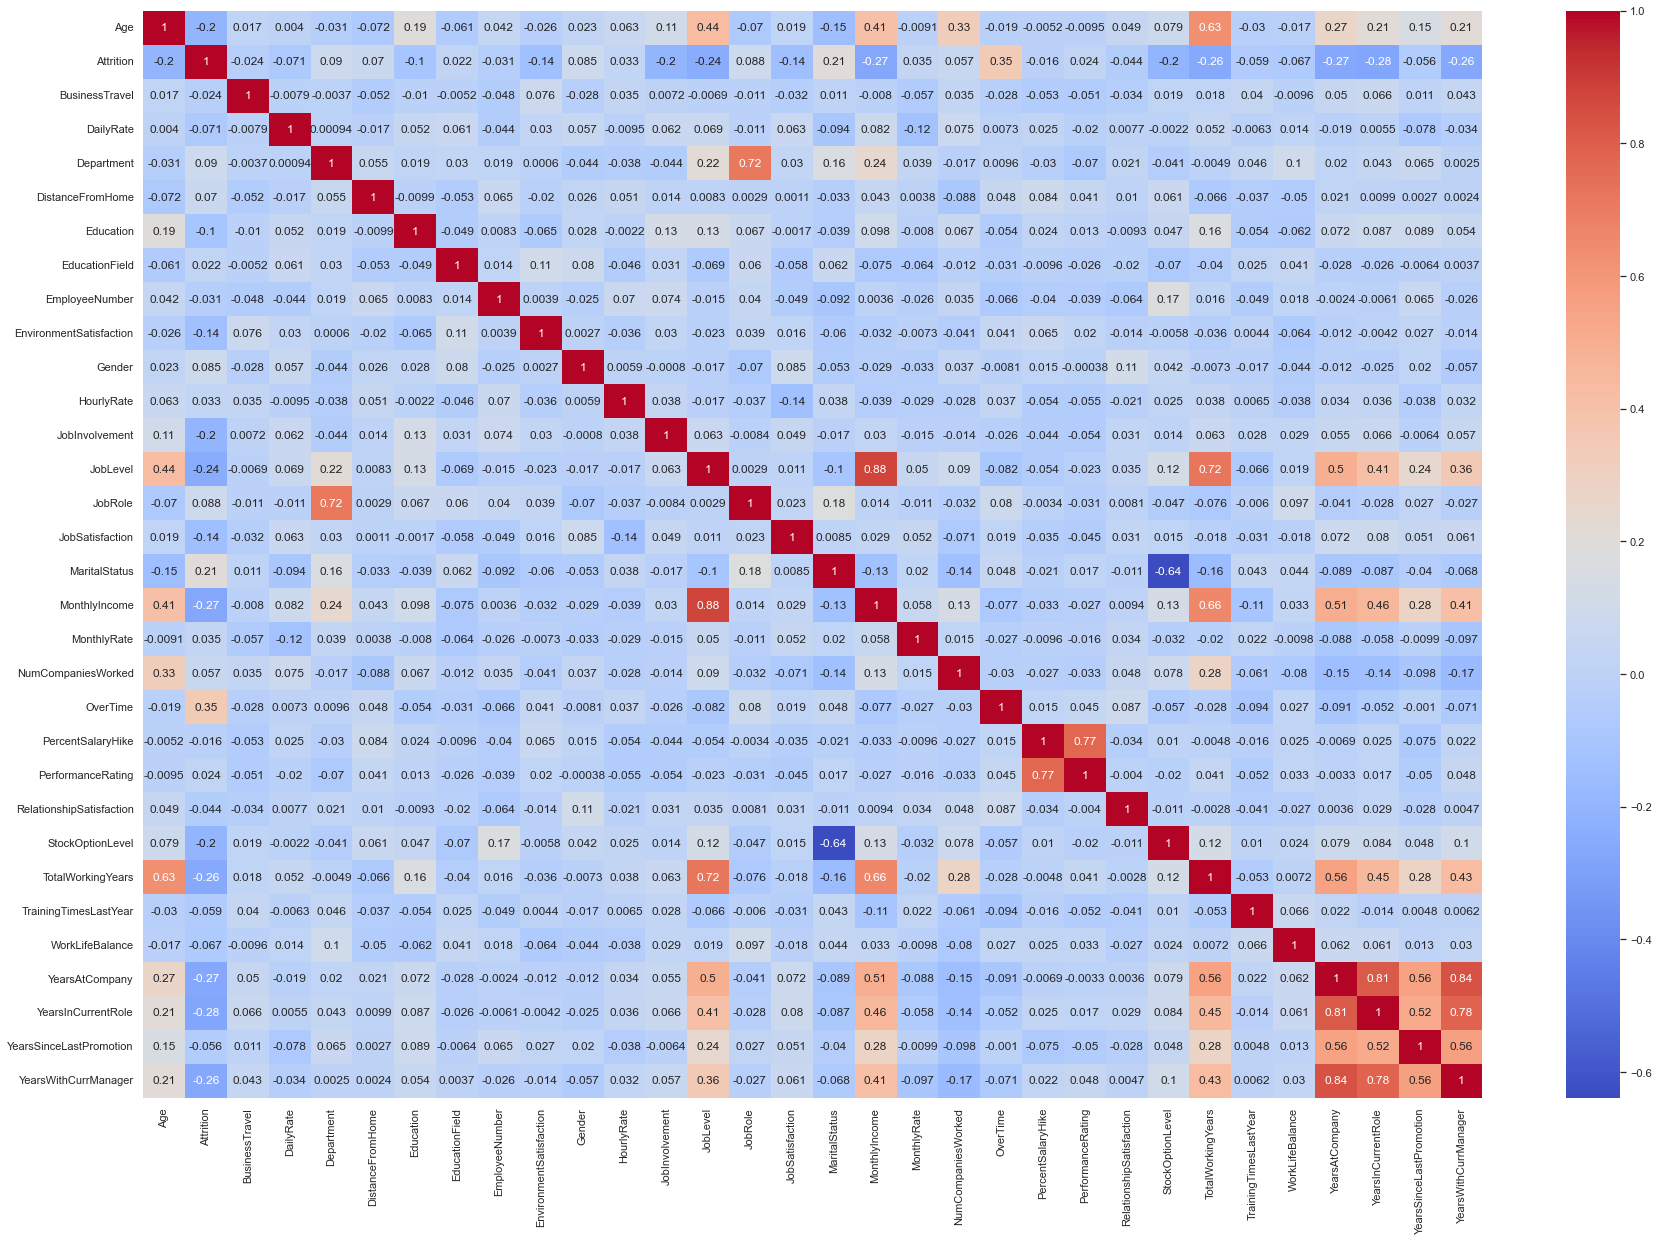

In [56]:
# heatmap
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

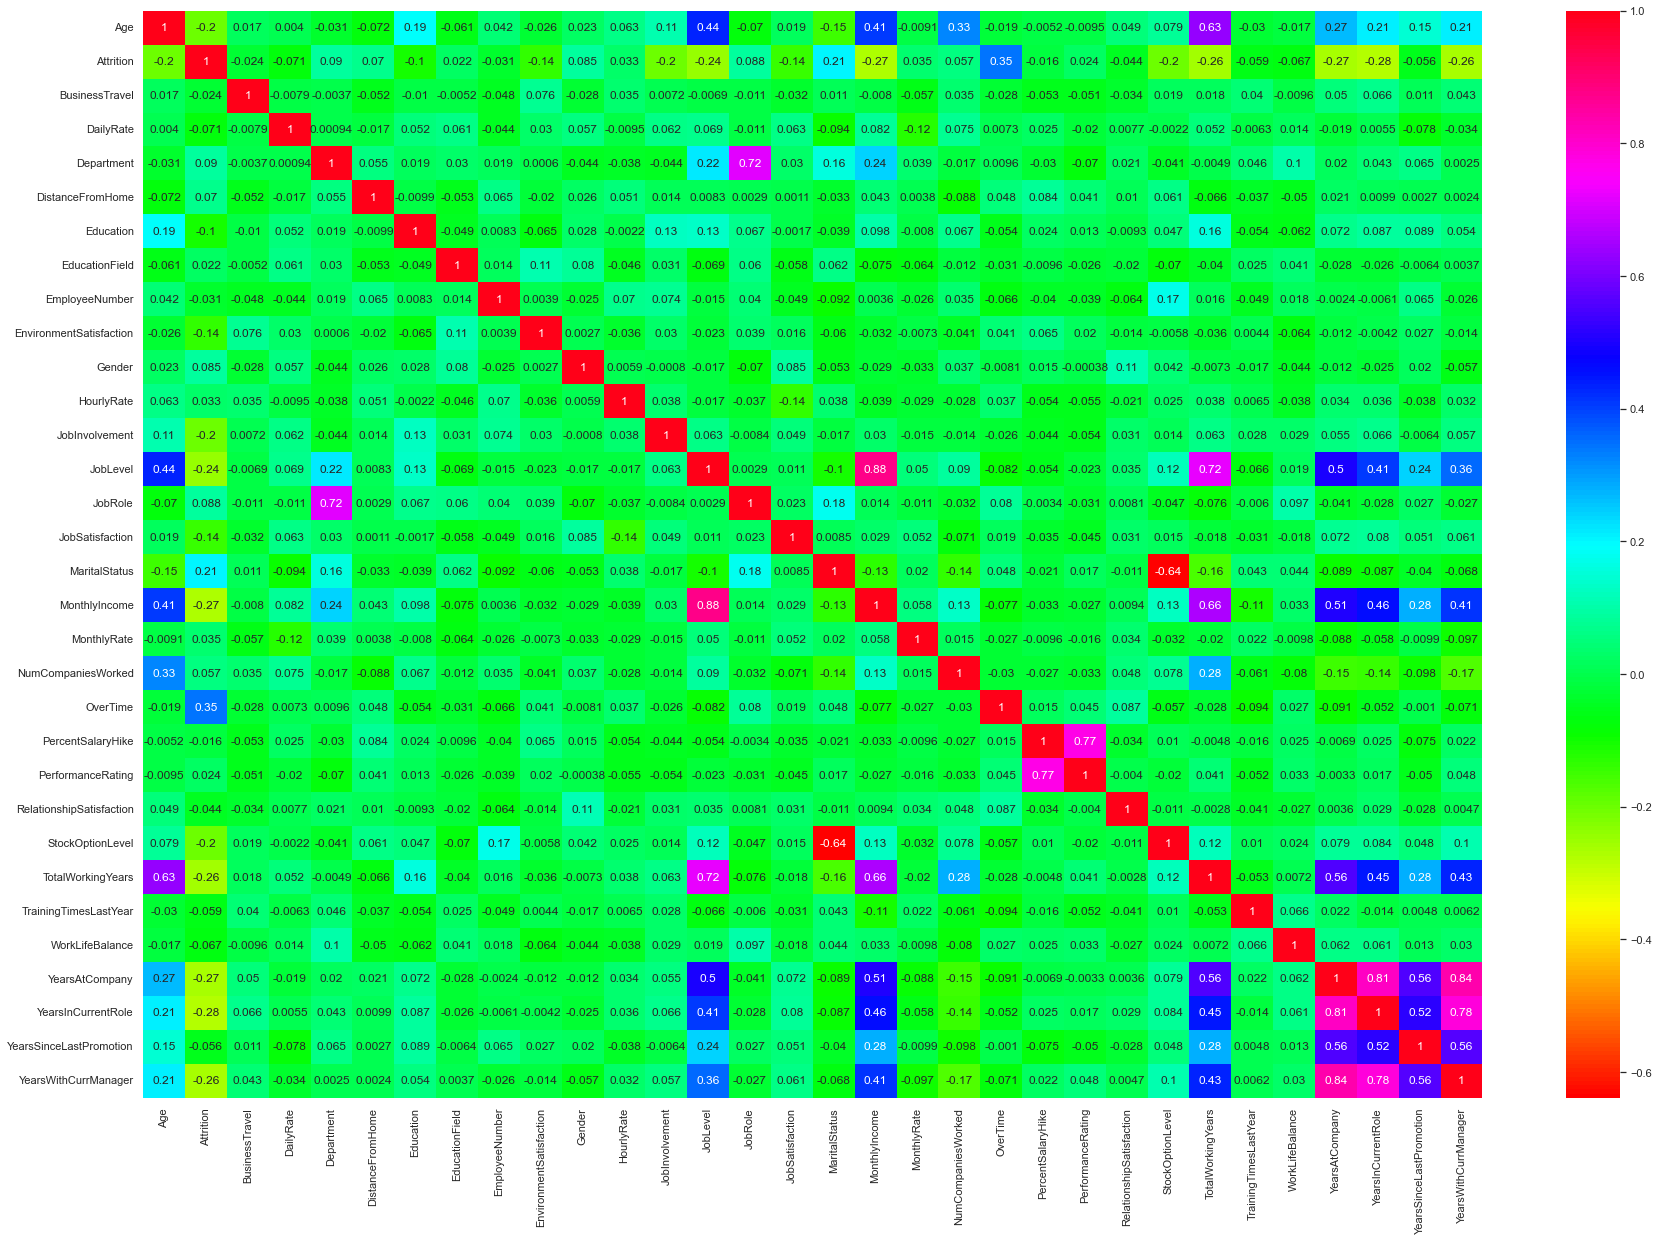

In [57]:
plt.figure(figsize = (30,20))
data_corr=df.corr()
sns.heatmap(data_corr, annot = True,cmap = "hsv")
plt.show()

In [58]:
# standardising the data for PCA
x=df.drop(columns=["Attrition"])
y=df['Attrition']

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_x = scaler.fit_transform(x)

#PCA
from sklearn.decomposition import PCA

test_pca = PCA()
Y=test_pca.fit(scaled_x)

var_c=np.cumsum(Y.explained_variance_ratio_)*100

var_c

array([ 14.80477867,  21.56287629,  27.78943434,  33.55125112,
        38.42143906,  42.62205515,  46.77847755,  50.67212273,
        54.37014556,  57.88547641,  61.30462316,  64.66835596,
        67.9971956 ,  71.31493222,  74.23871656,  77.12665942,
        79.91787009,  82.67476477,  85.19277094,  87.68977884,
        89.98128956,  92.18966555,  93.78045306,  95.30653216,
        96.37049665,  97.30049564,  98.00141697,  98.64435628,
        99.27488783,  99.69211062, 100.        ])

In [59]:
k=np.argmax(var_c > 95)
print("Number of components explaining 99% variance: ",k)

Number of components explaining 99% variance:  23


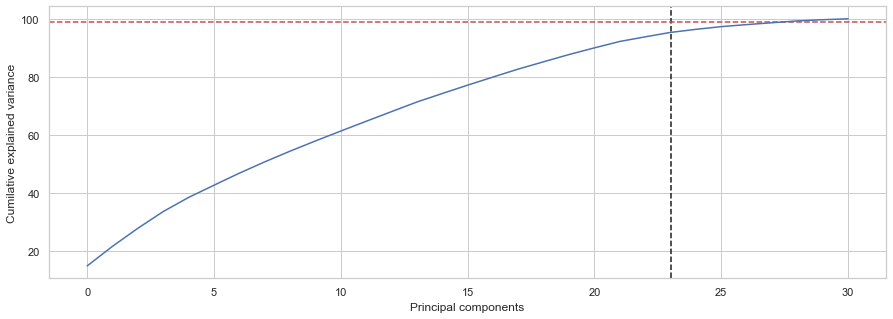

In [60]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))

plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='r',linestyle='--')

plt.plot(var_c)
plt.show()

In [61]:
Final = PCA(n_components = 23)
FinalData = Final.fit_transform(scaled_x)

FinalData_1=pd.DataFrame(FinalData)
FinalData_1

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2.739697,2.362314,-2.388044,0.005880,1.638820,-0.936491,0.897808,-0.076385,-0.615817,-1.242842,...,1.476238,0.041385,0.159821,0.258350,0.080265,1.475410,-0.704421,-1.368004,-1.020664,-0.643093
1,-0.214733,0.213383,0.632038,-0.343662,1.842992,0.791574,-2.427176,-1.081090,1.009418,-0.130683,...,-0.207752,-1.166544,0.962348,0.228349,-1.472925,0.823632,-0.317167,-1.635127,-0.258340,-0.464496
2,-0.954887,1.243015,1.446221,-2.036285,-3.181209,-1.412279,0.341142,1.024339,-0.884136,-1.876853,...,0.400260,-1.256543,1.612928,-0.554160,0.937289,1.033078,-0.130723,0.067922,0.638999,0.164505
3,-0.817912,0.704727,-0.398829,0.103435,0.026837,-0.037073,2.938576,-0.642363,0.138462,0.031517,...,-0.749358,1.284295,1.068743,-0.287637,0.189656,-0.354519,-0.485342,0.123862,-0.037243,-2.142036
4,2.638140,-1.015161,-1.284257,-0.761779,-1.492529,1.294078,2.624236,-0.062564,0.939302,0.682289,...,-0.246704,-0.703724,-0.112801,0.249990,0.389093,0.217383,1.112330,-1.331051,0.599806,-0.173869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,-2.927072,-0.637706,-0.512366,0.696188,-2.353720,-0.588623,0.039620,-0.751689,1.154554,2.390407,...,0.048408,0.684585,-0.472642,-0.370489,-0.062985,-0.110090,1.314279,-1.797977,0.628977,-0.729755
454,-0.907780,1.646514,-1.222189,-0.260976,-1.882441,0.797801,0.218434,-1.078373,1.403280,-0.647010,...,-1.469647,-1.294779,-0.264734,-1.121209,0.877508,-2.526032,-0.411444,-0.877064,-0.019881,1.636013
455,2.521798,0.842270,0.925039,-2.756056,0.445458,0.633100,1.910161,1.008450,-1.065147,2.646966,...,0.201723,-0.801715,-0.520999,2.947148,0.017422,-0.676375,-0.978041,0.459384,0.637004,-0.278857
456,1.139461,2.361157,-2.699465,0.208146,-1.736417,-0.123815,-0.093885,0.838935,1.009003,-0.601826,...,0.053671,-0.345874,-0.597190,0.344375,-1.870067,0.209277,0.374551,0.493734,0.048911,0.007658


In [62]:
df = FinalData_1

In [63]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2.739697,2.362314,-2.388044,0.005880,1.638820,-0.936491,0.897808,-0.076385,-0.615817,-1.242842,...,1.476238,0.041385,0.159821,0.258350,0.080265,1.475410,-0.704421,-1.368004,-1.020664,-0.643093
1,-0.214733,0.213383,0.632038,-0.343662,1.842992,0.791574,-2.427176,-1.081090,1.009418,-0.130683,...,-0.207752,-1.166544,0.962348,0.228349,-1.472925,0.823632,-0.317167,-1.635127,-0.258340,-0.464496
2,-0.954887,1.243015,1.446221,-2.036285,-3.181209,-1.412279,0.341142,1.024339,-0.884136,-1.876853,...,0.400260,-1.256543,1.612928,-0.554160,0.937289,1.033078,-0.130723,0.067922,0.638999,0.164505
3,-0.817912,0.704727,-0.398829,0.103435,0.026837,-0.037073,2.938576,-0.642363,0.138462,0.031517,...,-0.749358,1.284295,1.068743,-0.287637,0.189656,-0.354519,-0.485342,0.123862,-0.037243,-2.142036
4,2.638140,-1.015161,-1.284257,-0.761779,-1.492529,1.294078,2.624236,-0.062564,0.939302,0.682289,...,-0.246704,-0.703724,-0.112801,0.249990,0.389093,0.217383,1.112330,-1.331051,0.599806,-0.173869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,-2.927072,-0.637706,-0.512366,0.696188,-2.353720,-0.588623,0.039620,-0.751689,1.154554,2.390407,...,0.048408,0.684585,-0.472642,-0.370489,-0.062985,-0.110090,1.314279,-1.797977,0.628977,-0.729755
454,-0.907780,1.646514,-1.222189,-0.260976,-1.882441,0.797801,0.218434,-1.078373,1.403280,-0.647010,...,-1.469647,-1.294779,-0.264734,-1.121209,0.877508,-2.526032,-0.411444,-0.877064,-0.019881,1.636013
455,2.521798,0.842270,0.925039,-2.756056,0.445458,0.633100,1.910161,1.008450,-1.065147,2.646966,...,0.201723,-0.801715,-0.520999,2.947148,0.017422,-0.676375,-0.978041,0.459384,0.637004,-0.278857
456,1.139461,2.361157,-2.699465,0.208146,-1.736417,-0.123815,-0.093885,0.838935,1.009003,-0.601826,...,0.053671,-0.345874,-0.597190,0.344375,-1.870067,0.209277,0.374551,0.493734,0.048911,0.007658


### Model Building

#### Finding best Random State

In [64]:
M_acc = 0
m_RS = 0

for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(scaled_x,y,test_size=.25,random_state=i)
    mod = LogisticRegression()
    mod.fit(X_train,Y_train)
    pred = mod.predict(X_test)
    acc = accuracy_score(Y_test,pred)
    if acc > M_acc:
        M_acc = acc
        m_RS = i

print("Best accuracy is", M_acc,"on Random State",m_RS)

Best accuracy is 0.8347826086956521 on Random State 177


#### Train and Test Split

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_x,y,test_size =.30, random_state = m_RS)

#### Comparing different models

In [66]:
# Logistic Regression

LR=LogisticRegression()
LR.fit(X_train,Y_train)
predlr = LR.predict(X_test)

AC = accuracy_score(Y_test,predlr)
print("Accuracy score: ", AC)

scr=cross_val_score(LR,scaled_x,y,cv=5)
CVS = scr.mean()
print("Cross validation score:", CVS)

Diff = AC-CVS
print("Difference:", Diff)

Accuracy score:  0.7898550724637681
Cross validation score: 0.71820353559484
Difference: 0.07165153686892811


In [67]:
# Decision Tree Classifier

DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)
preddt = DT.predict(X_test)

AC = accuracy_score(Y_test,preddt) 
print("Accuracy score",AC)

scr=cross_val_score(DT,scaled_x,y,cv=5)
CVS = scr.mean()
print("Cross validation score:", CVS)

Diff = AC-CVS
print("Difference:", Diff)

Accuracy score 0.5942028985507246
Cross validation score: 0.5654323936932633
Difference: 0.028770504857461354


In [68]:
# Random Forest

RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
predrf = RF.predict(X_test)

AC = accuracy_score(Y_test,predrf)
print("Accuracy score",AC)

scr=cross_val_score(RF,scaled_x,y,cv=5)
CVS = scr.mean()
print("Cross validation score:", CVS)

Diff = AC-CVS
print("Difference:", Diff)


Accuracy score 0.7536231884057971
Cross validation score: 0.5544911610129002
Difference: 0.19913202739289693


In [69]:
# cross verifying with AUC/ROC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [70]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
print("Logistic regression score is: ",lr.score(X_test,Y_test))
roc_auc_score(Y_test,lr.predict(X_test))

Logistic regression score is:  0.7898550724637681


0.7920969441517386

In [71]:
# Decision Tree 
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
print("Decision tree score is ",dt.score(X_test,Y_test))
roc_auc_score(Y_test,dt.predict(X_test))

Decision tree score is  0.572463768115942


0.5731296101159115

In [72]:
# Random Forest
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
print("Random forest score is",rf.score(X_test,Y_test))
roc_auc_score(Y_test,rf.predict(X_test))

Random forest score is 0.7391304347826086


0.7441517386722865

#### OBSERVATION

**Logistic Regression has best score** 

###  Hyper Parameter tuning

In [73]:
# Logistic Regression
paramters={'penalty':['l1', 'l2','elasticnet','none'],
           'dual':[True,False],
           'tol':[0.21,0.50,0.75,1,1.25,1.5],
           'C':[2,3,4,5,6,7,8,9],
           'intercept_scaling':[1.2,2.1,3.1,20.2],
}

In [74]:
GCV=GridSearchCV(LogisticRegression(),paramters,cv=5)

In [75]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [2, 3, 4, 5, 6, 7, 8, 9], 'dual': [True, False],
                         'intercept_scaling': [1.2, 2.1, 3.1, 20.2],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tol': [0.21, 0.5, 0.75, 1, 1.25, 1.5]})

In [76]:
GCV.best_params_

{'C': 2, 'dual': False, 'intercept_scaling': 1.2, 'penalty': 'l2', 'tol': 1}

In [77]:
mod=LogisticRegression(C=2,dual=False,intercept_scaling= '1.2',penalty='none',tol=1.25)

In [78]:
mod.fit(X_train,Y_train)
pred=mod.predict(X_test)
print(accuracy_score(Y_test,pred)*100)

79.71014492753623


In [79]:
regression=LogisticRegression()
regression.fit(X_train,Y_train)

LogisticRegression()

### Saving the Model

In [80]:
# Saving LogisticRegression model
import pickle
LogisticRegression_tree_model=LogisticRegression()
LogisticRegression_tree_model.fit(X_train,Y_train)

filename='finalized_model.pickle'
pickle.dump(LogisticRegression_tree_model,open(filename,'wb'))

In [81]:
y_pred=regression.predict(X_test)

In [82]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0])